In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb

# for cute, interactive plots
import plotly.express as px

# for converting country names into numerical values and continent codes
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

In [8]:
data = pd.read_csv('C:/Users/Natalie/Dropbox/Python_code/Datasets/LE_data.csv')
data.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
group_by_country = data.groupby('Country', as_index=[False]).mean()
group_by_country.head()

,Year,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,2007.5,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375


In [11]:
group_by_country['Life_expectancy '].sort_values(ascending=[False]).head(10)

Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Italy          82.18750
Spain          82.06875
Australia      81.81250
Norway         81.79375
Canada         81.68750
Name: Life_expectancy , dtype: float64

In [12]:
group_by_country['Life_expectancy '].sort_values(ascending=[True]).head(10)

Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Chad                        50.38750
Côte d'Ivoire               50.38750
Zimbabwe                    50.48750
Swaziland                   51.32500
Nigeria                     51.35625
Name: Life_expectancy , dtype: float64

In [18]:
bubble = data[['Country','GDP','Population','Life_expectancy ']].groupby('Country').mean()
bubble.dropna(inplace = True) #errors thrown if NaN values left in data frame slice

fig = px.scatter(bubble, x="GDP", y="Life_expectancy ",
                 size="Population", hover_name=bubble.index, log_x=True, size_max=50)
fig.show()

## Now let's try the bubble plot again, but categorize the countries based on continent

In [14]:
# make a dictionary of different continent codes
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

continent = []
for country in bubble.index:
    try:
        # translate all country names into continent codes, then find the appropriate continent name from our continents dict,
        # then append this name to our empty continent list
        continent.append(continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))])
    except:
        continent.append('Africa')

# add this continent list to our data frame
bubble['Continent'] = continent

#category_bubble = data[['Country','GDP','Population','Life_expectancy ','Continent']]
#category_bubble.dropna(inplace = True)

fig = px.scatter(bubble, x="GDP", y="Life_expectancy ", size="Population", color='Continent', 
                 hover_name=bubble.index, log_x=True, size_max=50)
fig.show()

<AxesSubplot:>

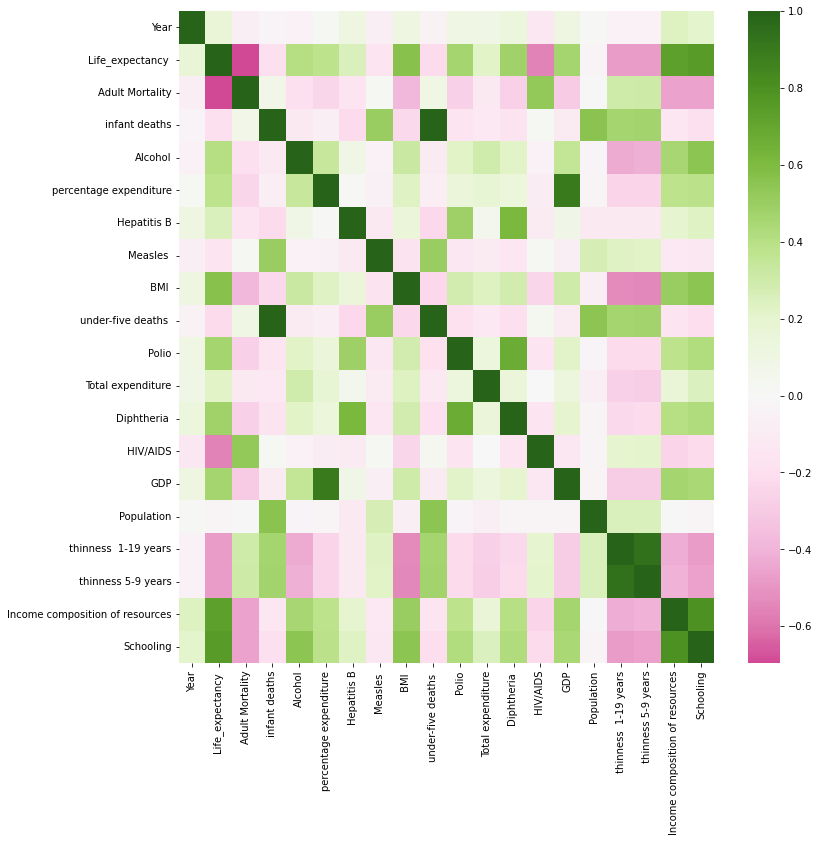

In [141]:
plt.figure(figsize=(12,12))
sb.heatmap(data.corr(), center=0, cmap='PiYG')

In [63]:
correlation_to_life_expect = data.corr()['Life_expectancy '][2:].sort_values(ascending=[False])
correlation_to_life_expect

Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life_expectancy , dtype: float64

In [65]:
correlation_to_GDP = data.corr()['GDP'][:].sort_values(ascending=[False])
correlation_to_GDP[1:]

percentage expenditure             0.899373
Life_expectancy                    0.461455
Income composition of resources    0.460341
Schooling                          0.448273
Alcohol                            0.354712
 BMI                               0.301557
Polio                              0.211976
Diphtheria                         0.200666
Total expenditure                  0.138364
Year                               0.101620
Hepatitis B                        0.083903
Population                        -0.028270
Measles                           -0.076466
infant deaths                     -0.108427
under-five deaths                 -0.112081
 HIV/AIDS                         -0.136491
 thinness  1-19 years             -0.285697
 thinness 5-9 years               -0.290539
Adult Mortality                   -0.296049
Name: GDP, dtype: float64

<AxesSubplot:xlabel='Life_expectancy ', ylabel='Count'>

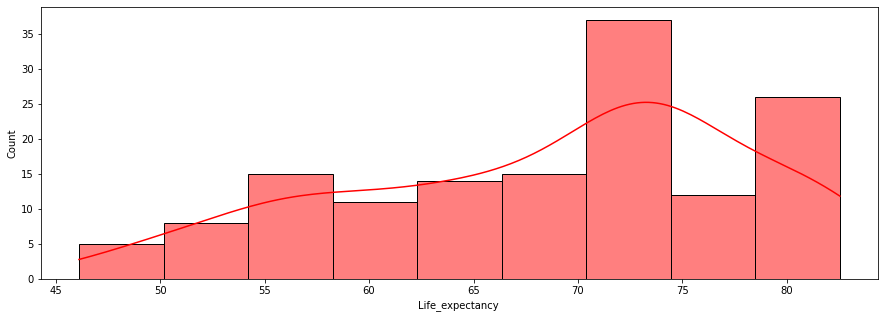

In [135]:
plt.figure(figsize=(15,5))
sb.histplot(bubble['Life_expectancy '].dropna(), color='red', kde=True)
# computes a kernel density estimate to smooth the distribution and plots on top

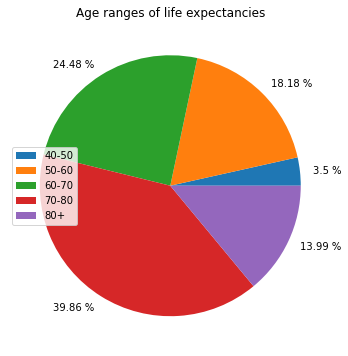

In [139]:
LE = bubble['Life_expectancy '].dropna().values

age_ranges = pd.Series({
    '40-50':len([count for count in LE if count <50]),
    '50-60':len([count for count in LE if count <60 and count >=50]),
    '60-70':len([count for count in LE if count <70 and count >=60]),
    '70-80':len([count for count in LE if count <80 and count >=70]),
    '80+':len([count for count in LE if count >=80])
})

perc = [str(round(num*100/age_ranges.values.sum(),2))+' %' for num in age_ranges.values]

plt.figure(figsize=(6,6))
plt.pie(age_ranges, labels=perc)
plt.legend(labels=age_ranges.index, loc='center left')
plt.title('Age ranges of life expectancies')
plt.show()